In [1]:
import itertools
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

import contractions
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Reading the data and Preparation

In [2]:
#reading the data
df=pd.read_csv('data_capstone_2/nlp_reviews_cleaned.csv', delimiter=',')

#creating the classes
df['rating_class'] = df['rating'].apply(lambda x: 0 if x <= 3 else 1)
print(df.rating_class.value_counts())

#train data set reduced due to capacity of computing
df_train = df[0:10000]

#splitting data set into train and test sets
X = df_train['clean_text']
y = df_train['rating_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

1    10421
0     2851
Name: rating_class, dtype: int64


## Inital Scores with best Vectorizer (CountVectorizer) and best n-gram (unigram) 

In [3]:
# Create the word vector with CountVectorizer

count_vect1 = CountVectorizer(ngram_range=(1,1))
count_vect_train1 = count_vect1.fit_transform(X_train)
count_vect_train1 = count_vect_train1.toarray()
count_vect_test1 = count_vect1.transform(X_test)
count_vect_test1 = count_vect_test1.toarray()

In [4]:
# Get the scores with the best vector (according to step1 and step2)

clf1 = LogisticRegression(random_state=1)

labels = ['Logistic Regression']
for clf, label in zip([clf1], labels):
    clf.fit(count_vect_train1, y_train)
    y_pred_clf = clf.predict(count_vect_test1)
    cm = confusion_matrix(y_test, y_pred_clf)
    
    print('\n********** [{}] **********\n'.format(label))
    print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf)))
    print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf, average='weighted')))
    print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf, average='weighted')))
    print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
        classification_report(y_test, y_pred_clf), cm))


********** [Logistic Regression] **********

1. Accuarcy: 0.824

2. The F-1 score of the model 0.8162350712701556

3. The recall score of the model 0.824

4. Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       567
           1       0.86      0.92      0.89      1933

   micro avg       0.82      0.82      0.82      2500
   macro avg       0.75      0.71      0.73      2500
weighted avg       0.81      0.82      0.82      2500

5. Confusion matrix:
[[ 287  280]
 [ 160 1773]]





In [45]:
clf2 = SVC(kernel = 'linear')

labels = ['Linear SVM']
for clf, label in zip([clf2], labels):
    clf.fit(count_vect_train1, y_train)
    y_pred_clf2 = clf.predict(count_vect_test1)
    cm = confusion_matrix(y_test, y_pred_clf2)
    
    print('\n********** [{}] **********\n'.format(label))
    print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf2)))
    print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf2, average='weighted')))
    print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf2, average='weighted')))
    print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
        classification_report(y_test, y_pred_clf2), cm))


********** [Linear SVM] **********

1. Accuarcy: 0.8084

2. The F-1 score of the model 0.80554359794688

3. The recall score of the model 0.8084

4. Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       567
           1       0.87      0.89      0.88      1933

   micro avg       0.81      0.81      0.81      2500
   macro avg       0.73      0.71      0.72      2500
weighted avg       0.80      0.81      0.81      2500

5. Confusion matrix:
[[ 305  262]
 [ 217 1716]]





In [118]:
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support

def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['avg / total'] = avg

    return class_report_df.T


def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df = df[:2]
    df['class']=['bad', 'not bad']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

frames = []
y_preds = [y_pred_clf, y_pred_clf2]
labels = ['LogReg', 'SVM']
vector = 'CountVect'
for y_pred, label in zip(y_preds, labels):
    df = comparison_matrix(y_test, y_pred, label, vector)
    frames.append(df)

result = pd.concat(frames)

result1 = result.set_index(['vectorizer', 'model', 'accuracy', 'class'])
print(result1)

  vectorizer   model  accuracy    class  precision    recall  f1-score  \
0  CountVect  LogReg    0.8240      bad   0.642058  0.506173  0.566075   
1  CountVect  LogReg    0.8240  not bad   0.863614  0.917227  0.889614   
0  CountVect     SVM    0.8084      bad   0.584291  0.537919  0.560147   
1  CountVect     SVM    0.8084  not bad   0.867543  0.887739  0.877525   

   support  
0    567.0  
1   1933.0  
0    567.0  
1   1933.0  


In [120]:
print(result.set_index(['vectorizer', 'model', 'accuracy', 'class']))

                                    precision    recall  f1-score  support
vectorizer model  accuracy class                                          
CountVect  LogReg 0.8240   bad       0.642058  0.506173  0.566075    567.0
                           not bad   0.863614  0.917227  0.889614   1933.0
           SVM    0.8084   bad       0.584291  0.537919  0.560147    567.0
                           not bad   0.867543  0.887739  0.877525   1933.0


In [124]:
result1 = result.set_index(['vectorizer', 'model', 'accuracy', 'class'])
print(result1)

                                    precision    recall  f1-score  support
vectorizer model  accuracy class                                          
CountVect  LogReg 0.8240   bad       0.642058  0.506173  0.566075    567.0
                           not bad   0.863614  0.917227  0.889614   1933.0
           SVM    0.8084   bad       0.584291  0.537919  0.560147    567.0
                           not bad   0.867543  0.887739  0.877525   1933.0


In [ ]:
df_class_report_logreg_cv = df_class_report_logreg_cv[['class', 'precision', 'recall', 'f1-score', 'support']]

In [46]:
df_class_report_logreg_cv = pandas_classification_report(y_true=y_test, y_pred=y_pred_clf)
df_class_report_logreg_cv = df_class_report_logreg_cv[:2]
df_class_report_logreg_cv['class']=['Bad', 'Not bad']
df_class_report_logreg_cv['accuracy']= metrics.accuracy_score(y_test, y_pred_clf)
df_class_report_logreg_cv = df_class_report_logreg_cv[
    ['accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
print(df_class_report_logreg_cv)

   accuracy    class  precision    recall  f1-score  support
0     0.824      Bad   0.642058  0.506173  0.566075    567.0
1     0.824  Not bad   0.863614  0.917227  0.889614   1933.0


In [114]:
frames = []
y_preds = [y_pred_clf, y_pred_clf2]
labels = ['LogReg', 'SVM']
vector = 'CountVect'
for y_pred, label in zip(y_preds, labels):
    df = comparison_matrix(y_test, y_pred, label, vector)
    frames.append(df)

result = pd.concat(frames)
print(result)
'''for item in models:
    df = 
df_svm = comparison_matrix(y_test, y_pred_clf2, 'SVM', 'CountVect')
df_log = comparison_matrix(y_test, y_pred_clf, 'LogReg', 'CountVect')'''

  vectorizer   model  accuracy    class  precision    recall  f1-score  \
0  CountVect  LogReg    0.8240      Bad   0.642058  0.506173  0.566075   
1  CountVect  LogReg    0.8240  Not bad   0.863614  0.917227  0.889614   
0  CountVect     SVM    0.8084      Bad   0.584291  0.537919  0.560147   
1  CountVect     SVM    0.8084  Not bad   0.867543  0.887739  0.877525   

   support  
0    567.0  
1   1933.0  
0    567.0  
1   1933.0  


"for item in models:\n    df = \ndf_svm = comparison_matrix(y_test, y_pred_clf2, 'SVM', 'CountVect')\ndf_log = comparison_matrix(y_test, y_pred_clf, 'LogReg', 'CountVect')"

In [78]:
frames = [df_svm, df_log]
result = pd.concat(frames)

In [85]:
'''
print(result.set_index(['vectorizer', 'model', 'accuracy']))
df10 = result.groupby(['vectorizer', 'class'])['f1-score'].max()
'''

                   accuracy    class  precision    recall  f1-score  support
vectorizer model                                                            
CountVect  SVM       0.8084      Bad   0.584291  0.537919  0.560147    567.0
           SVM       0.8084  Not bad   0.867543  0.887739  0.877525   1933.0
           LogReg    0.8240      Bad   0.642058  0.506173  0.566075    567.0
           LogReg    0.8240  Not bad   0.863614  0.917227  0.889614   1933.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

#X = iris.data
#y = iris.target

# Binarize the output
y = label_binarize(y_test, classes=[0, 1])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [8]:
from matplotlib import pyplot
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

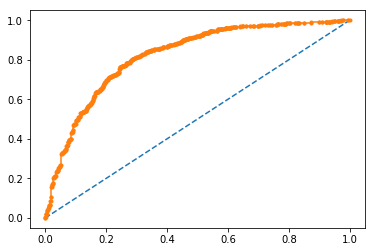

AUC: 0.822


In [9]:

def roc_cur(X_test, y_test):
    probs = clf.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.showauc_score = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc_score)

In [12]:
y_score = clf.fit(count_vect_train1, y_train).decision_function(count_vect_test1)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: Can only tuple-index with a MultiIndex

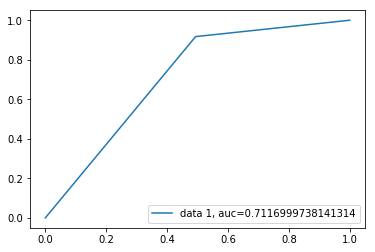

In [5]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_clf)
auc = metrics.roc_auc_score(y_test, y_pred_clf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
plot_ROC(y_train, y_train_prob, y_test, y_test_prob)

In [28]:
# Get the scores with the best vector (according to step1 and step2)

clf1 = LogisticRegression(random_state=1)
clf2 = SVC(kernel = 'linear') 
clf3 = GaussianNB()
clf4 = KNeighborsClassifier()
clf5 = RandomForestClassifier(random_state=1)
clf6 = GradientBoostingClassifier()

labels = ['Logistic Regression', 'Linear SVM', 'Naive Bayes', 'KNN', 'Random Forest', 'GradientBoosting', ]
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6], labels):
    clf.fit(count_vect_train1, y_train)
    y_pred_clf = clf.predict(count_vect_test1)
    cm = confusion_matrix(y_test, y_pred_clf)
    
    print('\n********** [{}] **********\n'.format(label))
    print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf)))
    print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf, average='weighted')))
    print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf, average='weighted')))
    print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
        classification_report(y_test, y_pred_clf), cm))


********** [Logistic Regression] **********

1. Accuarcy: 0.9

2. The F-1 score of the model 0.8866628460110704

3. The recall score of the model 0.9

4. Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.25      0.32       118
           1       0.92      0.97      0.95      1132

   micro avg       0.90      0.90      0.90      1250
   macro avg       0.69      0.61      0.63      1250
weighted avg       0.88      0.90      0.89      1250

5. Confusion matrix:
[[  29   89]
 [  36 1096]]




********** [Linear SVM] **********

1. Accuarcy: 0.8928

2. The F-1 score of the model 0.8883063890510475

3. The recall score of the model 0.8928

4. Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.35      0.38       118
           1       0.93      0.95      0.94      1132

   micro avg       0.89      0.89      0.89      1250
   macro avg       0.68      0.65      0.66      12

# 1. Logistic Regression

## 1.1 Logisric Regression - Hyperparameter Tuning

In [84]:
# define the paramater spaces
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, params, cv=5)
# Fit it to the data
logreg_cv.fit(count_vect_train1, y_train)
# Print the tuned parameters and score

print('\n********** Logistic Regression **********\n')
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf)))
print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf, average='weighted')))
print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf, average='weighted')))
print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
    classification_report(y_test, y_pred_clf), cm))


********** Logistic Regression **********

Tuned Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2'}
Best score is 0.9189333333333334


ValueError: Found input variables with inconsistent numbers of samples: [2500, 1250]

## 1.2 Logisric Regression - Modeling with Test Set

In [7]:
label = 'Logistic Regression'
clf = LogisticRegression(C=0.1, penalty='l2')

clf.fit(count_vect_train1, y_train)
y_pred_clf = clf.predict(count_vect_test1)
cm = confusion_matrix(y_test, y_pred_clf)
    
print('\n********** [{}] **********\n'.format(label))
print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf)))
print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf, average='weighted')))
print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf, average='weighted')))
print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
    classification_report(y_test, y_pred_clf), cm))


********** [Logistic Regression] **********

1. Accuarcy: 0.9064

2. The F-1 score of the model 0.8817491157291112

3. The recall score of the model 0.9064

4. Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.14      0.23       118
           1       0.92      0.99      0.95      1132

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.72      0.56      0.59      1250
weighted avg       0.88      0.91      0.88      1250

5. Confusion matrix:
[[  17  101]
 [  16 1116]]





# 1.3 Logisric Regression - Modeling with Train Set

In [8]:
label = 'Logistic Regression'
clf = LogisticRegression(C=0.1, penalty='l2')

clf.fit(count_vect_train1, y_train)
y_pred_clf = clf.predict(count_vect_train1)
cm = confusion_matrix(y_train, y_pred_clf)
    
print('\n********** [{}] **********\n'.format(label))
print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_train, y_pred_clf)))
print('2. The F-1 score of the model {}\n'.format(f1_score(y_train, y_pred_clf, average='weighted')))
print('3. The recall score of the model {}\n'.format(recall_score(y_train, y_pred_clf, average='weighted')))
print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
    classification_report(y_train, y_pred_clf), cm))


********** [Logistic Regression] **********

1. Accuarcy: 0.9685333333333334

2. The F-1 score of the model 0.9652290559106603

3. The recall score of the model 0.9685333333333334

4. Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       319
           1       0.97      1.00      0.98      3431

   micro avg       0.97      0.97      0.97      3750
   macro avg       0.98      0.82      0.88      3750
weighted avg       0.97      0.97      0.97      3750

5. Confusion matrix:
[[ 201  118]
 [   0 3431]]





## 1.4 Logisric Regression - Hyperparameter Tuning Result

### Contribution of Hyperparameter tuning (on Test Set): - 0.05 % 

# 2. Linear SVM

## 2.1. Linear SVM - Hyperparameter Tuning

In [10]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm=SVC(kernel='linear')
svm_cv = GridSearchCV(svm, param_grid, cv=5)

# Fit to the training set
svm_cv.fit(count_vect_train1, y_train)

# Compute and print metrics
print("Accuracy: {}".format(svm_cv.score(count_vect_test1, y_test)))
print("Tuned Model Parameters: {}".format(svm_cv.best_params_))

Accuracy: 0.9056
Tuned Model Parameters: {'C': 0.001, 'gamma': 0.001}


## 2.2. Linear SVM (Tuned) - Modeling with Test Set

In [6]:
label = 'Logistic Regression'
clf = SVC(kernel='linear', C=0.001, gamma=0.001)

clf.fit(count_vect_train1, y_train)
y_pred_clf = clf.predict(count_vect_test1)
cm = confusion_matrix(y_test, y_pred_clf)
    
print('\n********** [{}] **********\n'.format(label))
print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf)))
print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf, average='weighted')))
print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf, average='weighted')))
print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
    classification_report(y_test, y_pred_clf), cm))


********** [Logistic Regression] **********

1. Accuarcy: 0.9056

2. The F-1 score of the model 0.8607382031905961

3. The recall score of the model 0.9056

4. Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.91      1.00      0.95      1132

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.45      0.50      0.48      1250
weighted avg       0.82      0.91      0.86      1250

5. Confusion matrix:
[[   0  118]
 [   0 1132]]





# Computations for other models delayed due to limitations of capacity

In [1]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

/Users/onlyone/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [76]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

nb_model = MultinomialNB()

# Create the pipeline 
clf = pipeline.Pipeline([('nb', nb_model)])

# parameter grid
param_grid = {'nb__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Grid Search Model
model = GridSearchCV(estimator=clf, param_grid=param_grid,
                     verbose=10, n_jobs=-1, iid=True, refit=True, cv=2)

# Fit Grid Search Model
model.fit(count_vect_train1, y_train)  # we can use the full data here but im only using xtrain. 

print("Accuracy: {}".format(model.score(count_vect_train1, y_train)))
print("Tuned Model Parameters: {}".format(model.best_params_))

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   20.5s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:   24.4s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   24.8s finished


Accuracy: 0.9149333333333334
Tuned Model Parameters: {'nb__alpha': 10}


In [80]:
clf_nb = MultinomialNB(alpha = 10)

clf_nb.fit(count_vect_train1, y_train)
y_pred_clf = clf.predict(count_vect_train1)
cm = confusion_matrix(y_train, y_pred_clf)
    
print('\n********** MultinomialNB on train set **********\n')
print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_train, y_pred_clf)))
print('2. The F-1 score of the model {}\n'.format(f1_score(y_train, y_pred_clf, average='weighted')))
print('3. The recall score of the model {}\n'.format(recall_score(y_train, y_pred_clf, average='weighted')))
print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
    classification_report(y_train, y_pred_clf), cm))


********** MultinomialNB on train set **********

1. Accuarcy: 0.9546666666666667

2. The F-1 score of the model 0.9480687114894255

3. The recall score of the model 0.9546666666666667

4. Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.50      0.65       319
           1       0.96      1.00      0.98      3431

   micro avg       0.95      0.95      0.95      3750
   macro avg       0.95      0.75      0.81      3750
weighted avg       0.95      0.95      0.95      3750

5. Confusion matrix:
[[ 158  161]
 [   9 3422]]





In [81]:
y_pred_clf = clf.predict(count_vect_test1)
cm = confusion_matrix(y_test, y_pred_clf)
    
print('\n********** [{}] **********\n'.format(label))
print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf)))
print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf, average='weighted')))
print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf, average='weighted')))
print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format(
    classification_report(y_test, y_pred_clf), cm))


********** [MultinomialNB] **********

1. Accuarcy: 0.9048

2. The F-1 score of the model 0.8633327710340627

3. The recall score of the model 0.9048

4. Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.02      0.03       118
           1       0.91      1.00      0.95      1132

   micro avg       0.90      0.90      0.90      1250
   macro avg       0.65      0.51      0.49      1250
weighted avg       0.86      0.90      0.86      1250

5. Confusion matrix:
[[   2  116]
 [   3 1129]]



